In [183]:
import os
from datetime import datetime
from collections import Counter

import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
from konlpy.tag import Mecab

pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)

%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# by parsing html

## url_nonojapan

In [2]:
url_nonojapan = 'https://nonojapan.com/'

## html_nono

In [3]:
r = requests.get(url_nonojapan)
html_nono = r.text
html_nono[:200]

'<!DOCTYPE html>\r\n<html lang="en" class="no-js">\r\n<head>\r\n  <div>\r\n  <!-- Global site tag (gtag.js) - Google Analytics -->\r\n  <script async src="https://www.googletagmanager.com/gtag/js?id=UA-143617518'

## path_nono

In [4]:
dir_html = './html/'
os.makedirs(dir_html, exist_ok=True)

file_nono = 'nonojapan.html'
path_nono = dir_html + file_nono

## write html_nono

In [5]:
with open(path_nono, 'w') as f:
    f.write(html_nono)

## soup: soup

In [6]:
with open(path_nono) as f:
    text = f.read()
    soup = bs(text, 'html.parser')

soup

<!DOCTYPE html>

<html class="no-js" lang="en">
<head>
<div>
<!-- Global site tag (gtag.js) - Google Analytics -->
<script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-143617518-1"></script>
<script>
    window.dataLayer = window.dataLayer || [];
    function gtag(){dataLayer.push(arguments);}
    gtag('js', new Date());

    gtag('config', 'UA-143617518-1');
  </script>
<meta content="65ba5833f608b6501ddc06f689be6e55d5294a25" name="naver-site-verification"/>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible">
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=0" name="viewport"/>
<title>노노재팬</title>
<meta content="일본 제품 정보와 및 대체할 수 있는 제품 정보를 제공합니다. 나아가 일본 제품으로 오해받는 제품이나, 소비 촉진을 위한 정보도 준비 중입니다." name="description"/>
<meta content="일본, 불매, 운동, 대체, 상품" name="keywords"/>
<meta content="BK" name="author"/>
<link href="https://nonojapan.com" rel="canonical"/>
<meta content="노노재팬 | 일본 제품 정보와 및 대체할 수 있는 제품 정보를 제공합니다

## cards: soup

In [7]:
cards = soup.select('div.mdl-card')

## get_data_from_card()

In [9]:
def get_data_from_card(card):
#     card = cards[0]
#     card

    result = {}

    a = card.select_one('a')
    href = a['href']
    result['링크'] = href
    result

    span = card.select('span')
    span
    span_text = [s.get_text() for s in span]
    span_text
    result['분류'] = span_text[0]
    result['댓글수'] = span_text[1]
    result['태그'] = span_text[2:]
    result

    h3 = card.select_one('h3')
    h3_text = h3.get_text()
    h3_text
    result['상품명'] = h3_text
    result

    button = card.select('button')
    button_text = [b.get_text() for b in button]
    result['대체상품'] = button_text
    return result
    

In [10]:
data = [get_data_from_card(card) for card in cards]
data

[{'링크': '/product/168',
  '분류': '기타',
  '댓글수': '1',
  '태그': ['New', '#지퍼', ' #의류부자재', ' #지퍼에YKK'],
  '상품명': '와이케이케이',
  '대체상품': ['YBS', ' KSK']},
 {'링크': '/product/167',
  '분류': '기타',
  '댓글수': '2',
  '태그': ['New', '#콘돔', '  #전범기업', '  #위안부보급'],
  '상품명': '오카모토',
  '대체상품': ['유니더스 울트라씬', ' 바른생각', ' 듀렉스', ' 아우성']},
 {'링크': '/product/166',
  '분류': '화장품',
  '댓글수': '0',
  '태그': ['New', '#선크림', ' #극우', ' #클렌징'],
  '상품명': '디에이치씨',
  '대체상품': ['이니스프리', '  더페이스샵', '  미샤', ' 에뛰드하우스', ' 아미퓨어']},
 {'링크': '/product/165',
  '분류': '음식',
  '댓글수': '3',
  '태그': ['New', '#과자', ' #감자칩', ' #허니버터', ' #자가비', ' #해태'],
  '상품명': '가루비',
  '대체상품': ['오리온', ' 크라운', ' 빙그레', ' 오뚜기', ' 삼양']},
 {'링크': '/product/164',
  '분류': '취미',
  '댓글수': '1',
  '태그': ['New', '#PFU', ' #키보드', ' #토프레'],
  '상품명': '해피해킹',
  '대체상품': ['한성', ' 앱코', '  제닉스', ' 마이크로소프트', ' 커세어']},
 {'링크': '/product/162',
  '분류': '기타',
  '댓글수': '17',
  '태그': ['New', '#항공사', ' #여행', ' #환승', ' #원월드'],
  '상품명': '일본항공(JAL)',
  '대체상품': ['대한항공',
   ' 아시아나항공',
   ' 델타항공

## nono: df

In [11]:
nono = pd.DataFrame(data=data)
nono.head()

,대체상품,댓글수,링크,분류,상품명,태그
0,"[YBS, KSK]",1,/product/168,기타,와이케이케이,"[New, #지퍼, #의류부자재, #지퍼에YKK]"
1,"[유니더스 울트라씬, 바른생각, 듀렉스, 아우성]",2,/product/167,기타,오카모토,"[New, #콘돔, #전범기업, #위안부보급]"
2,"[이니스프리, 더페이스샵, 미샤, 에뛰드하우스, 아미퓨어]",0,/product/166,화장품,디에이치씨,"[New, #선크림, #극우, #클렌징]"
3,"[오리온, 크라운, 빙그레, 오뚜기, 삼양]",3,/product/165,음식,가루비,"[New, #과자, #감자칩, #허니버터, #자가비, #해태]"
4,"[한성, 앱코, 제닉스, 마이크로소프트, 커세어]",1,/product/164,취미,해피해킹,"[New, #PFU, #키보드, #토프레]"


# by api

In [247]:
def get_all_product_list(url):
#     url = url_cmmt[-1]
    page_number = 1
    total_result = []
    while True:
        url_with_page = url + str(page_number)
        r = requests.get(url_with_page)
        raw = r.json()
        result_page = raw.get('result', {}).get('content', [])
        if len(result_page) == 0:
            break
        total_result.extend(result_page)
        page_number += 1

    return total_result


url = 'https://nonojapan.com/products/'
# url = url_cmmt[-1]
# result = get_all_product_list(url)

# nono = pd.DataFrame(result)
# nono.head()

## to_csv

In [246]:
# nono.to_csv(dir_data + 'products.tsv', sep='\t', index=False)

In [248]:
nono = pd.read_csv(dir_data + 'products.tsv', sep='\t')
nono.head()

,altProducts,category,categoryEng,commentCount,globalYn,id,japanYn,koreaYn,logoUrl,memos,name,nameEng,nation,productType,tags
0,"['설화수', ' 아모레퍼시픽', ' 빌리프', ' 아미퓨어', ' 라프레리']",화장품,cosmetic,1,False,172,False,False,NaN,[],코스메데코르테,cosme de corte,일본,GENERAL,"['#백화점', ' #화장품', ' #리포솜']"
1,"['딥디크', ' 조말론', ' 버버리']",화장품,cosmetic,0,False,171,False,False,NaN,[],페르난다,fernanda,일본,GENERAL,"['#향수', ' #바디미스트', ' #핸드크림']"
2,"['YBS', ' KSK']",기타,etc,8,False,168,False,False,NaN,[],와이케이케이,ykk,일본,GENERAL,"['#지퍼', ' #의류부자재', ' #지퍼에YKK']"
3,"['유니더스 울트라씬', ' 바른생각', ' 듀렉스', ' 아우성']",기타,etc,4,False,167,False,False,NaN,[],오카모토,okamoto,일본,GENERAL,"['#콘돔', ' #전범기업', ' #위안부보급']"
4,"['이니스프리', ' 더페이스샵', ' 미샤', ' 에뛰드하우스', ' 아미퓨어']",화장품,cosmetic,6,False,166,False,False,NaN,[],디에이치씨,DHC,일본,GENERAL,"['#선크림', ' #극우', ' #클렌징']"


## Add 가루비

In [230]:
# from io import StringIO
# calbee_text = '[오리온, 크라운, 빙그레, 오뚜기, 삼양]	음식	food	3	False	165	False	False	None	[]	가루비	calbee	일본	GENERAL	[#과자, #감자칩, #허니버터, #자가비, #해태]'

# output = StringIO(calbee_text)
# calbee = pd.read_csv(output, sep='\t', header=None)
# output.close()
# calbee

# nono = nono.append(calbee)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,"[오리온, 크라운, 빙그레, 오뚜기, 삼양]",음식,food,3,False,165,False,False,None,[],가루비,calbee,일본,GENERAL,"[#과자, #감자칩, #허니버터, #자가비, #해태]"


## shape

In [249]:
nono.shape

(132, 15)

# nono: shape

## 등록된 제품 수: 131 (29 Jul)

In [170]:
nono.shape

(130, 15)

# 분류별 제품 수

In [146]:
tmp = nono.groupby('category').agg({'name': 'count'}).sort_values('name', ascending=False)
tmp.reset_index(inplace=True)
tmp

,category,name
0,패션,20
1,가전제품,19
2,취미,17
3,자동차,13
4,화장품,13
5,음식,12
6,기타,10
7,생활,9
8,의약품,6
9,반려동물,4


## dir

In [158]:
dir_item = '/home/jake/Documents/News_Item/'
dir_proj = dir_item + 'boycott_japan/'
dir_tableau = dir_proj + 'tableau_data/'
dir_pictures = dir_proj + 'pictures/'

## to_csv

In [150]:
# tmp.to_csv(dir_tableau + 'categories.tsv', sep='\t', index=False)

한국 사회 곳곳에 일본 제품의 영향력이 큰 분야들.  
패션, 가전제품, 취미, 자동차 분야에서 시민들이 일본 제품을 많이 인식하고 있다.

# -----------------------------------

# nonojapan comment

# get_comment_from_product(url)

In [23]:
def get_comment_from_product(url):
#     url = url_cmmt[-1]
    page_number = 1
    total_result = []
    while True:
        url_with_page = url + str(page_number)
        r = requests.get(url_with_page)
        raw = r.json()
        result_page = raw.get('result', {}).get('content', [])
        if len(result_page) == 0:
            break
        total_result.extend(result_page)
        page_number += 1

    return total_result


# url = url_cmmt[-1]
# get_comment_from_product(url)

# get_all_comment(nono)

In [25]:
def get_all_comment(nono):
    result = pd.DataFrame()
    for idx, row in nono.iterrows():
        name = row['name']
        product_id = row['id']
        url = f'{url_nonojapan}api/product/{product_id}/comments/'
        comments = get_comment_from_product(url)
        df = pd.DataFrame(comments)
        df['product'] = name
        result = result.append(df, sort=False)

    def get_nickname_oauth_type(x):
        dic = dict(x)
        return pd.Series([dic.get('nickName', ''), dic.get('oauthType', '')], index=['nickName', 'oauthType'])

    result[['nickName', 'oauthType']] = result['user'].apply(get_nickname_oauth_type)
    result.drop('user', axis=1, inplace=True)
    
    result['createDatetime_dt'] = result['createDatetime'].apply(datetime.fromtimestamp)
    return result

# cmmt: df

In [250]:
cmmt = get_all_comment(nono)
cmmt.head()

,content,createDatetime,id,mine,modDateTimeJson,modDatetime,negativeCnt,positiveCnt,side,product,nickName,oauthType,createDatetime_dt
0,노노재팬 관리자님? 메인에 일본제품 한글명만 있는데요. 영문도 표기해주세요. 동남아시아 쪽도 일본에 피해입은 강제징용 대상자 많습니다. 그분들도 참여할 수 있게 로고는 어렵다 해도 작게라도 영문표기도 해주세요. 부탁드립니다.,1.564435e+09,2427.0,False,2019-07-30 06:18,1.564435e+09,0.0,0.0,0.0,코스메데코르테,ik..,kakao,2019-07-30 06:18:42
0,Ykk는 대체불가 자전거의 시마노,1.564392e+09,2367.0,False,2019-07-29 18:25,1.564392e+09,0.0,0.0,0.0,와이케이케이,고재일 Side B,kakao,2019-07-29 18:25:24
1,"루이비통, 페라가모 외 해외 브랜드에서 Ykk사용되고있다고 합니다. 대체불가아닐까요",1.564390e+09,2354.0,False,2019-07-29 17:41,1.564390e+09,0.0,0.0,0.0,와이케이케이,리아99,kakao,2019-07-29 17:41:39
2,"또한 옛날에도 그랬고 (1991년 6월 13일 매일경제 18면 기사도 나와 있었습니다.) 지금도 YKK 짝퉁이 버젓이 팔려나가고 있습니다. 따라서 YKK 불매는 반일감정 보다는 짝퉁 근절에 염두를 두고 하는 것이 좋습니다. (당연하지만, 기업간으로 직접 거래하는 B2B에는 짝퉁이 있을 리 없습니다.)",1.564383e+09,2332.0,False,2019-07-29 15:57,1.564383e+09,0.0,0.0,0.0,와이케이케이,정다운/Milda/PET프로/HVT,kakao,2019-07-29 15:57:42
3,"YKK는 부자재 특성상 B2B 거래가 압도적이기 때문에 대체가 어렵습니다. DIY 쪽에서는 어느정도 회피가 가능합니다만, 매출에 치명적인 영향을 줄 수는 없을 듯 합니다. 참고로 창업자 요시다 타다오는 만주사변(1931년)으로 인하여 경영에 어려움을 겪은 바 있었으며, 제2차 세계대전 때에는 일본 내 공장이 전소된 바 있었습니다. https://www.ykkkorea.com/company/history",1.564383e+09,2330.0,False,2019-07-29 15:47,1.564383e+09,0.0,0.0,0.0,와이케이케이,정다운/Milda/PET프로/HVT,kakao,2019-07-29 15:47:09


In [251]:
A = set(cmmt['product'].value_counts().index.tolist())
B = set(nono['name'].value_counts().index.tolist())
print(A - B)
print(B-A)

set()
{'바운티 헌터', '파오', '페르난다', '카사업', '로고스', '삿포로'}


# path_cmmt

In [252]:
dir_data = 'data/'
os.makedirs(dir_data, exist_ok=True)
file_cmmt = 'comments.tsv'
path_cmmt = dir_data + file_cmmt

# cmmt.to_csv(path_cmmt, sep='\t', index=False)

In [29]:
cmmt = pd.read_csv(path_cmmt, sep='\t')
cmmt['createDatetime_dt'] = pd.to_datetime(cmmt['createDatetime_dt'])
cmmt.head()

,content,createDatetime,id,mine,modDateTimeJson,modDatetime,negativeCnt,positiveCnt,side,product,nickName,oauthType,createDatetime_dt
0,이런것까지도 일본제였네요.,1.564312e+09,2210.0,False,2019-07-29 06:59,1.564351e+09,0.0,2.0,0.0,와이케이케이,성현영,kakao,2019-07-28 20:10:26
1,국내 생산하는 세이브 콘돔도 있습니다,1.564358e+09,2270.0,False,2019-07-29 08:58,1.564358e+09,0.0,0.0,0.0,오카모토,효진,kakao,2019-07-29 08:58:23
2,일제 응원하는 일베는 이건 사놔도 쓸 데가 없을 듯ㅎ,1.564324e+09,2235.0,False,2019-07-28 23:20,1.564324e+09,0.0,0.0,0.0,오카모토,윤성훈,kakao,2019-07-28 23:20:42
3,아...앙돼 이젠 허니버터칩도 못먹게 된다구.,1.564348e+09,2266.0,False,2019-07-29 06:09,1.564348e+09,0.0,0.0,0.0,가루비,추여진,kakao,2019-07-29 06:09:10
4,''해태 calbee'' 과자 좋아했는데...\n,1.564312e+09,2211.0,False,2019-07-28 20:14,1.564312e+09,0.0,0.0,0.0,가루비,성현영,kakao,2019-07-28 20:14:18


# shape

## 댓글 개수: 1699개 (7월 29일 오전 기준)

In [30]:
cmmt.shape

(1699, 13)

# info

In [31]:
cmmt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699 entries, 0 to 1698
Data columns (total 13 columns):
content              1699 non-null object
createDatetime       1699 non-null float64
id                   1699 non-null float64
mine                 1699 non-null bool
modDateTimeJson      1699 non-null object
modDatetime          1699 non-null float64
negativeCnt          1699 non-null float64
positiveCnt          1699 non-null float64
side                 1699 non-null float64
product              1699 non-null object
nickName             1699 non-null object
oauthType            1699 non-null object
createDatetime_dt    1699 non-null datetime64[ns]
dtypes: bool(1), datetime64[ns](1), float64(6), object(5)
memory usage: 161.0+ KB


# 댓글이 가장 많이 달린 브랜드

In [151]:
tmp = cmmt.groupby('product').agg({'id':'count'}).sort_values('id', ascending=False).head(10)
tmp.reset_index(inplace=True)
tmp

,product,id
0,유니클로,96
1,소니 플레이스테이션,71
2,리얼포스,58
3,니콘,47
4,데상트,45
5,캐논,44
6,무인양품,44
7,ABC마트,43
8,우르오스,38
9,챠오츄르,35


## to_csv

In [152]:
# tmp.to_csv(dir_tableau + 'comment_count_by_brand.tsv', sep='\t', index=False)

In [33]:
cmmt.head()

,content,createDatetime,id,mine,modDateTimeJson,modDatetime,negativeCnt,positiveCnt,side,product,nickName,oauthType,createDatetime_dt
0,이런것까지도 일본제였네요.,1.564312e+09,2210.0,False,2019-07-29 06:59,1.564351e+09,0.0,2.0,0.0,와이케이케이,성현영,kakao,2019-07-28 20:10:26
1,국내 생산하는 세이브 콘돔도 있습니다,1.564358e+09,2270.0,False,2019-07-29 08:58,1.564358e+09,0.0,0.0,0.0,오카모토,효진,kakao,2019-07-29 08:58:23
2,일제 응원하는 일베는 이건 사놔도 쓸 데가 없을 듯ㅎ,1.564324e+09,2235.0,False,2019-07-28 23:20,1.564324e+09,0.0,0.0,0.0,오카모토,윤성훈,kakao,2019-07-28 23:20:42
3,아...앙돼 이젠 허니버터칩도 못먹게 된다구.,1.564348e+09,2266.0,False,2019-07-29 06:09,1.564348e+09,0.0,0.0,0.0,가루비,추여진,kakao,2019-07-29 06:09:10
4,''해태 calbee'' 과자 좋아했는데...\n,1.564312e+09,2211.0,False,2019-07-28 20:14,1.564312e+09,0.0,0.0,0.0,가루비,성현영,kakao,2019-07-28 20:14:18


# 가장 댓글이 많이 달린 날짜, 시간

## cmmt_trend: df

In [144]:
cmmt_trend = cmmt.resample('H', on='createDatetime_dt').agg({'id':'count'})
cmmt_trend.reset_index(inplace=True)
cmmt_trend

,createDatetime_dt,id
0,2019-07-21 17:00:00,3
1,2019-07-21 18:00:00,1
2,2019-07-21 19:00:00,1
3,2019-07-21 20:00:00,1
4,2019-07-21 21:00:00,4
5,2019-07-21 22:00:00,1
6,2019-07-21 23:00:00,2
7,2019-07-22 00:00:00,2
8,2019-07-22 01:00:00,1
9,2019-07-22 02:00:00,0


## cmmt_trend: plot

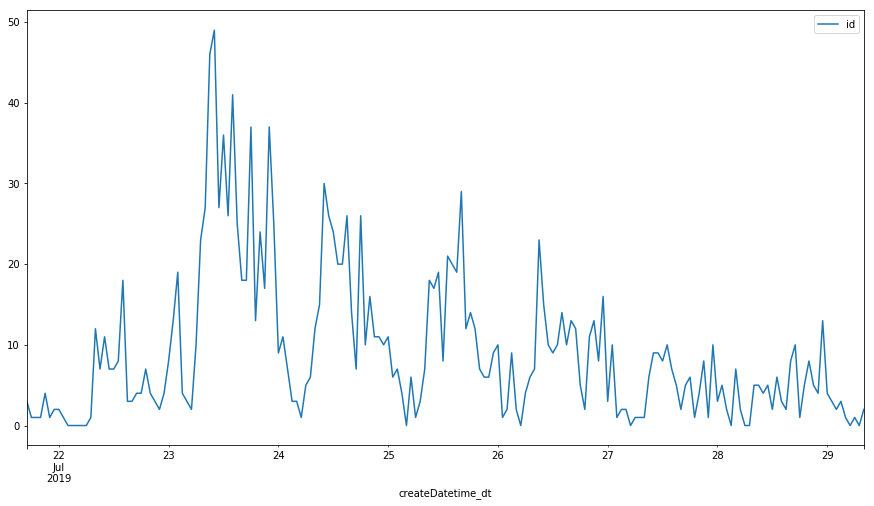

In [184]:
cmmt_trend.plot(x='createDatetime_dt', y='id', kind='line', figsize=(15,8))

## to_csv

In [185]:
# cmmt_trend.to_csv(dir_tableau + 'cmmt_trend.tsv', sep='\t', index=False)

# 댓글 많이단 사람

In [143]:
cmmt.head(30)

,content,createDatetime,id,mine,modDateTimeJson,modDatetime,negativeCnt,positiveCnt,side,product,nickName,oauthType,createDatetime_dt
0,이런것까지도 일본제였네요.,1.564312e+09,2210.0,False,2019-07-29 06:59,1.564351e+09,0.0,2.0,0.0,와이케이케이,성현영,kakao,2019-07-28 20:10:26
1,국내 생산하는 세이브 콘돔도 있습니다,1.564358e+09,2270.0,False,2019-07-29 08:58,1.564358e+09,0.0,0.0,0.0,오카모토,효진,kakao,2019-07-29 08:58:23
2,일제 응원하는 일베는 이건 사놔도 쓸 데가 없을 듯ㅎ,1.564324e+09,2235.0,False,2019-07-28 23:20,1.564324e+09,0.0,0.0,0.0,오카모토,윤성훈,kakao,2019-07-28 23:20:42
3,아...앙돼 이젠 허니버터칩도 못먹게 된다구.,1.564348e+09,2266.0,False,2019-07-29 06:09,1.564348e+09,0.0,0.0,0.0,가루비,추여진,kakao,2019-07-29 06:09:10
4,''해태 calbee'' 과자 좋아했는데...\n,1.564312e+09,2211.0,False,2019-07-28 20:14,1.564312e+09,0.0,0.0,0.0,가루비,성현영,kakao,2019-07-28 20:14:18
5,해태 너마저도......,1.564300e+09,2185.0,False,2019-07-28 16:45,1.564300e+09,0.0,0.0,0.0,가루비,이정우,kakao,2019-07-28 16:45:37
6,삭제 되었습니다.,1.564313e+09,2215.0,False,2019-07-28 20:33,1.564314e+09,0.0,0.0,0.0,해피해킹,권세인,kakao,2019-07-28 20:30:38
7,삭제 되었습니다.,1.564247e+09,2121.0,False,2019-07-29 01:22,1.564331e+09,0.0,0.0,0.0,일본항공(JAL),이우백 010-3542-0058,kakao,2019-07-28 01:56:30
8,JAL은 스타얼라이언스 회원사 소속이아닌\n원월드 소속입니다.\n수정 부탁드립니다.,1.564217e+09,2064.0,False,2019-07-29 01:22,1.564331e+09,0.0,0.0,0.0,일본항공(JAL),윤재훈,kakao,2019-07-27 17:35:21
9,불매운동 화이팅!\n,1.564201e+09,2026.0,False,2019-07-29 01:22,1.564331e+09,0.0,0.0,0.0,일본항공(JAL),최유라,kakao,2019-07-27 13:23:32


In [138]:
tmp = cmmt.groupby('nickName').agg({'id':'count'}).sort_values('id', ascending=False)
tmp.head(10)

,id
nickName,
김경래,26
TIM,24
.-69981000,21
종현,17
吊兒郎當,14
정다운/Milda/PET프로/HVT,13
김가남,11
규희,11
Jeff(YW),10


In [140]:
cmmt['nickName'].nunique()

1083

In [139]:
tmp.mean()

id    1.56879
dtype: float64

# 댓글에 가장 많이 쓰인 단어

In [38]:
mecab = Mecab()
content = ' '.join(cmmt['content'].tolist())
result = mecab.pos(content)
result[:5]

[('이런', 'MM'), ('것', 'NNB'), ('까지', 'JX'), ('도', 'JX'), ('일본제', 'NNG')]

In [39]:
def get_counter_by_tag(tag='NNG'):
    words = [pair[0] for pair in result if pair[1]==tag]
    cnter = Counter(words)
    return cnter


nng = get_counter_by_tag()
nng.most_common(11)

[('제품', 357),
 ('삭제', 332),
 ('브랜드', 228),
 ('대체', 182),
 ('상품', 148),
 ('기업', 141),
 ('국내', 119),
 ('불매', 114),
 ('회사', 106),
 ('추천', 101),
 ('국산', 85)]

In [137]:
cmmt.loc[cmmt['content']=='삭제 되었습니다.'].shape

(326, 13)

In [40]:
nnp = get_counter_by_tag('NNP')
nnp.most_common(11)

[('일본', 493),
 ('한국', 122),
 ('유니클로', 54),
 ('삼성', 51),
 ('미국', 50),
 ('아사히', 29),
 ('재팬', 28),
 ('신도리코', 27),
 ('닛산', 25),
 ('중국', 23),
 ('캐논', 22)]

## nouns

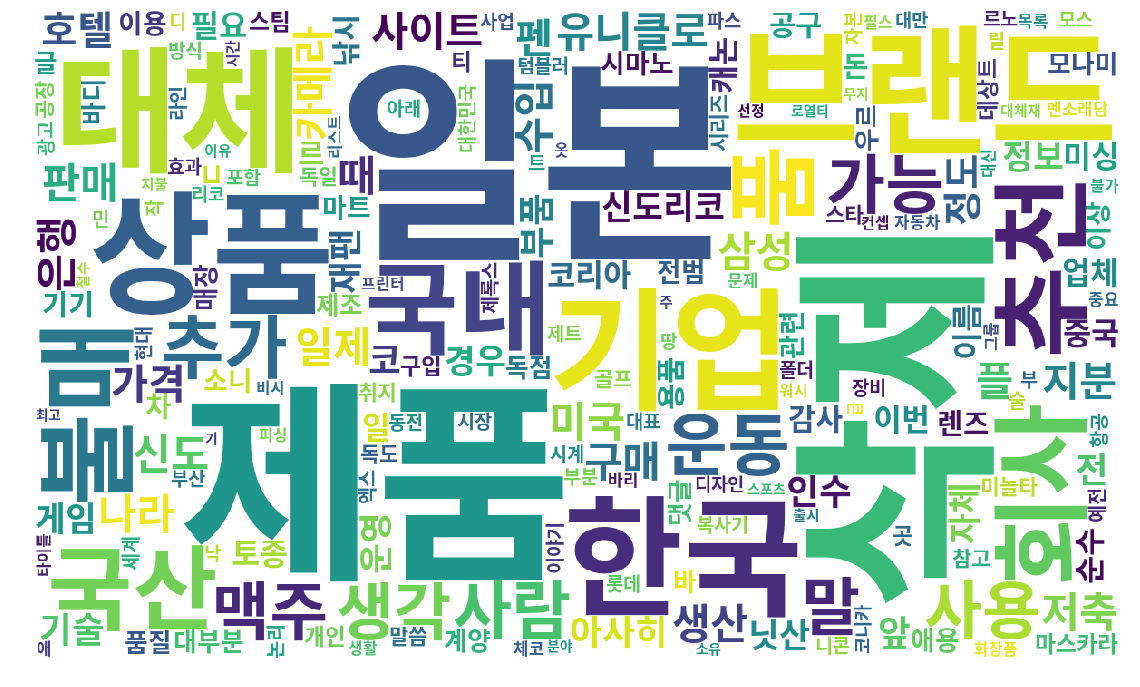

In [160]:
nouns = nng + nnp
nouns

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import math

plt.figure(figsize=(20, 12))
font_path = '/usr/share/fonts/opentype/noto/NotoSansCJK-Bold.ttc'
word_frequencies = dict(nouns)

# The frequencies too wide. Get log values
word_freq_log2 = {k: math.log2(v) for k, v in word_frequencies.items()}

wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False, width=1200, height=720, font_path=font_path).generate_from_frequencies(word_freq_log2)
plt.imshow(wordcloud)
plt.title('')
plt.axis('off')
wordcloud.to_file(dir_pictures + 'wordcloud.jpg')
# fig = plt.gcf()
# fig.savefig(file_name)
plt.show()

# ----------------------

# Clien

# get_clien_list_item()

In [49]:
def get_clien_list_item(page_no=0):
    url_clien = f'https://www.clien.net/service/group/clien_all?&od=T31&po={page_no}'

    r = requests.get(url_clien)
    soup = bs(r.text, 'html.parser')
    return soup.select('.list_item.symph_row')

# get_clien_data_from_item()

In [43]:
def get_clien_data_from_item(item):

    board_name = item.select_one('.shortname').get_text()
    title = item.select_one('.subject_fixed').get_text()
    nickname = item.select_one('.nickname').get_text().strip()
    if nickname == '':
        nickname = item.select_one('.nickname img')['alt']
    like = item.select_one('.list_symph').get_text()
    hit = item.select_one('.list_hit').get_text().strip()
    time_stamp = item.select_one('.timestamp').get_text()
    time_stamp_dt = datetime.strptime(time_stamp, "%Y-%m-%d %H:%M:%S")

    return {
        'board_name': board_name,
        'title': title,
        'nickname': nickname,
        'like': like,
        'hit': hit,
        'time_stamp': time_stamp,
        'time_stamp_dt': time_stamp_dt}

In [50]:
list_item = get_clien_list_item()

In [54]:
page_data = [get_clien_data_from_item(item) for item in list_item]
page_data

[{'board_name': '모공',
  'title': '호날두 vs 메시',
  'nickname': 'elecmonk',
  'like': '0',
  'hit': '60',
  'time_stamp': '2019-07-29 09:32:29',
  'time_stamp_dt': datetime.datetime(2019, 7, 29, 9, 32, 29)},
 {'board_name': '모공',
  'title': '원래 원작이 있는 영화 중에는 싱크로율 무시하고 대박난 영화도 있지만..',
  'nickname': '다크윈드',
  'like': '0',
  'hit': '147',
  'time_stamp': '2019-07-29 09:31:52',
  'time_stamp_dt': datetime.datetime(2019, 7, 29, 9, 31, 52)},
 {'board_name': '모공',
  'title': '속타는 가재와 즐거운 멍뭉이들.gif',
  'nickname': '외선이',
  'like': '0',
  'hit': '354',
  'time_stamp': '2019-07-29 09:31:45',
  'time_stamp_dt': datetime.datetime(2019, 7, 29, 9, 31, 45)},
 {'board_name': '모공',
  'title': '네이버 스노우피크 카페 근황',
  'nickname': 'LONGMAN',
  'like': '0',
  'hit': '332',
  'time_stamp': '2019-07-29 09:31:24',
  'time_stamp_dt': datetime.datetime(2019, 7, 29, 9, 31, 24)},
 {'board_name': '모공',
  'title': '브롤스타즈 만점 만들고 싶네요.',
  'nickname': 'falafel',
  'like': '0',
  'hit': '78',
  'time_stamp': '2019-07-29 09:31:

In [55]:
page_df = pd.DataFrame(data=page_data)
page_df.head()

,board_name,hit,like,nickname,time_stamp,time_stamp_dt,title
0,모공,60,0,elecmonk,2019-07-29 09:32:29,2019-07-29 09:32:29,호날두 vs 메시
1,모공,147,0,다크윈드,2019-07-29 09:31:52,2019-07-29 09:31:52,원래 원작이 있는 영화 중에는 싱크로율 무시하고 대박난 영화도 있지만..
2,모공,354,0,외선이,2019-07-29 09:31:45,2019-07-29 09:31:45,속타는 가재와 즐거운 멍뭉이들.gif
3,모공,332,0,LONGMAN,2019-07-29 09:31:24,2019-07-29 09:31:24,네이버 스노우피크 카페 근황
4,모공,78,0,falafel,2019-07-29 09:31:01,2019-07-29 09:31:01,브롤스타즈 만점 만들고 싶네요.


In [56]:
page_df.loc[0, 'time_stamp_dt'].hour

9

# get_clien_all_data()

In [57]:
def get_clien_all_data(dt_end):
    page_no = 0
    month_limit = 7
    day_limit = 26
    result = pd.DataFrame()

    
    while True:
        list_item = get_clien_list_item(page_no)
        page_data = [get_clien_data_from_item(item) for item in list_item]
        page_df = pd.DataFrame(data=page_data)
        
        written = page_df.loc[0, 'time_stamp_dt']
        
        if written <= dt_end:
            break
            
        result = result.append(page_df, sort=False)
        page_no += 1
        previous_written = written

    return result

In [58]:
dt_start = datetime(2019, 7, 27,); dt_start

datetime.datetime(2019, 7, 27, 0, 0)

In [59]:
dt_end = datetime(2019, 6, 25); dt_end

datetime.datetime(2019, 6, 25, 0, 0)

# clien: df_from_web

In [60]:
clien = get_clien_all_data(dt_end)
clien.head()

,board_name,hit,like,nickname,time_stamp,time_stamp_dt,title
0,모공,1,0,뱃살아재,2019-07-29 09:35:12,2019-07-29 09:35:12,아수스 AC5300이 공유기 끝판왕인 이유
1,모공,40,0,영엠디,2019-07-29 09:34:56,2019-07-29 09:34:56,일본을 앞지르는걸 볼 수 있겠죠?
2,직홍게,3,0,skmagic원탑몰,2019-07-29 09:34:36,2019-07-29 09:34:36,[SK매직공식접수처][비/교/불/가][무조건역대급대박지급]#얼음정수기#공기청정기#비데
3,아질게,28,0,앤죠,2019-07-29 09:33:56,2019-07-29 09:33:56,인덕션냄비
4,모공,394,0,외선이,2019-07-29 09:33:46,2019-07-29 09:33:46,정말 불쌍한 멍뭉이들.gif


In [83]:
clien.tail()

,board_name,hit,like,nickname,time_stamp,time_stamp_dt,title
113310,모공,1215,6,로히,2019-06-24 23:52:41,2019-06-24 23:52:41,아이즈원) 프메도 앚망진창
113311,모공,1002,0,쿠키맨,2019-06-24 23:52:21,2019-06-24 23:52:21,알아두면 좋은 생활의 지혜.avi
113312,모공,934,0,칼쓰뎅,2019-06-24 23:51:45,2019-06-24 23:51:45,밑에 피아노 조율 얘기나오길래...
113313,모공,6196,1,목천료향시가,2019-06-24 23:51:32,2019-06-24 23:51:32,롯데리아가 단종 시킨 버거들.jpg
113314,육아당,490,0,UQAM,2019-06-24 23:51:28,2019-06-24 23:51:28,슬픈노래를 불러주니 아기가 우네요 ㅎㅎ


In [66]:
clien.shape

(113315, 7)

# to_csv

In [65]:
file_clien = 'clien.tsv'
path_clien = dir_data + file_clien

clien.to_csv(path_clien, sep='\t', index=False)

# clien: read_csv

In [67]:
raw_clien = pd.read_csv(path_clien, sep='\t')
print(raw_clien.shape)
raw_clien.head()

(113315, 7)


,board_name,hit,like,nickname,time_stamp,time_stamp_dt,title
0,모공,1,0,뱃살아재,2019-07-29 09:35:12,2019-07-29 09:35:12,아수스 AC5300이 공유기 끝판왕인 이유
1,모공,40,0,영엠디,2019-07-29 09:34:56,2019-07-29 09:34:56,일본을 앞지르는걸 볼 수 있겠죠?
2,직홍게,3,0,skmagic원탑몰,2019-07-29 09:34:36,2019-07-29 09:34:36,[SK매직공식접수처][비/교/불/가][무조건역대급대박지급]#얼음정수기#공기청정기#비데
3,아질게,28,0,앤죠,2019-07-29 09:33:56,2019-07-29 09:33:56,인덕션냄비
4,모공,394,0,외선이,2019-07-29 09:33:46,2019-07-29 09:33:46,정말 불쌍한 멍뭉이들.gif


In [69]:
clien = raw_clien.copy()
clien['time_stamp_dt'] = pd.to_datetime(clien['time_stamp_dt'])
clien.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113315 entries, 0 to 113314
Data columns (total 7 columns):
board_name       113315 non-null object
hit              113315 non-null object
like             113315 non-null int64
nickname         113315 non-null object
time_stamp       113315 non-null object
time_stamp_dt    113315 non-null datetime64[ns]
title            113315 non-null object
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 6.1+ MB


# mogong

In [70]:
mogong = clien.loc[clien['board_name']=='모공']
mogong.shape

(81488, 7)

In [71]:
def get_clien_trend(df):
    result = df.resample('D', on='time_stamp_dt').agg({'title':'count'})
    return result

def draw_clien_trend(df):
    df.plot(kind='line', figsize=(20,6))

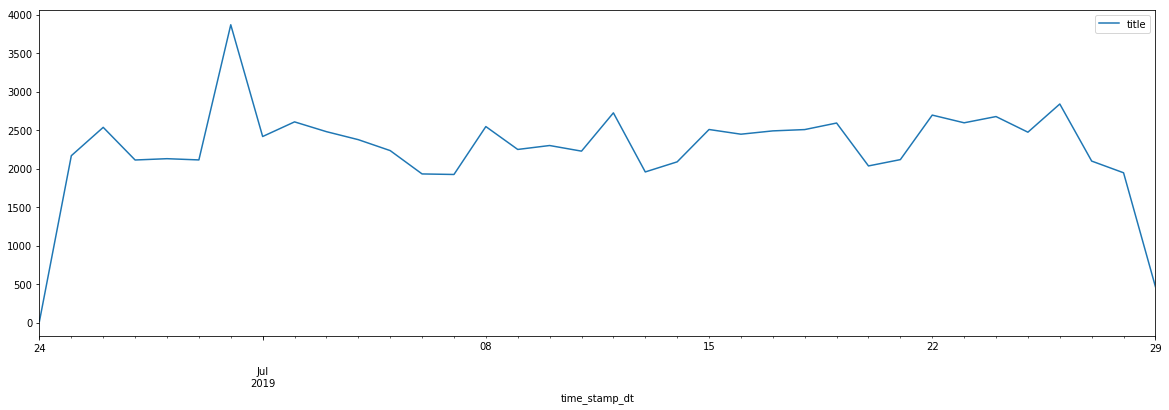

In [72]:
total_trend = get_clien_trend(mogong)

draw_clien_trend(total_trend)

In [221]:
def get_clien_trend_by_keyword(keyword, df=mogong):
    tmp = df.loc[df['title'].str.contains(keyword)].copy()
    tmp = get_clien_trend(tmp)
    tmp.reset_index(inplace=True)
    tmp['keyword'] = keyword
    return tmp

In [188]:
def draw_clien_trend_by_keyword(keyword, df=mogong):
    tmp = df.loc[df['title'].str.contains(keyword)]
    draw_clien_trend(get_clien_trend(tmp))

## mogong trend

In [222]:
tmp = get_clien_trend_by_keyword('일본')
print(tmp.shape)
tmp2 = get_clien_trend_by_keyword('불매')
print(tmp2.shape)
tmp3 = get_clien_trend_by_keyword('유니클로')
print(tmp3.shape)
tmp4 = get_clien_trend_by_keyword('호날두')
print(tmp4.shape)
tmp5 = pd.concat([tmp, tmp2, tmp3, tmp4], axis=0)

tmp5.shape

(35, 3)
(29, 3)
(33, 3)
(33, 3)


(130, 3)

## to_csv

In [224]:
# tmp5.to_csv(dir_tableau + 'mogong_trend.tsv', sep='\t', index=False)

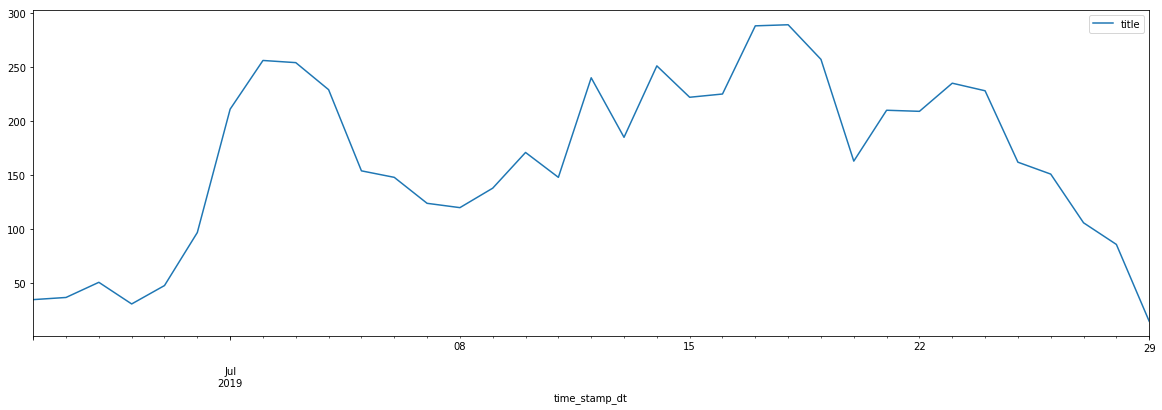

In [189]:
draw_clien_trend_by_keyword('일본')

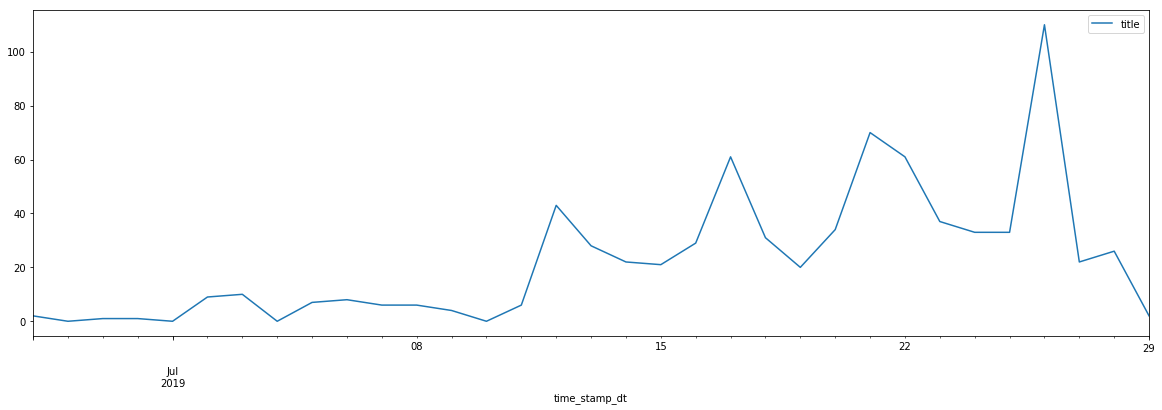

In [77]:
draw_clien_trend_by_keyword('유니클로')

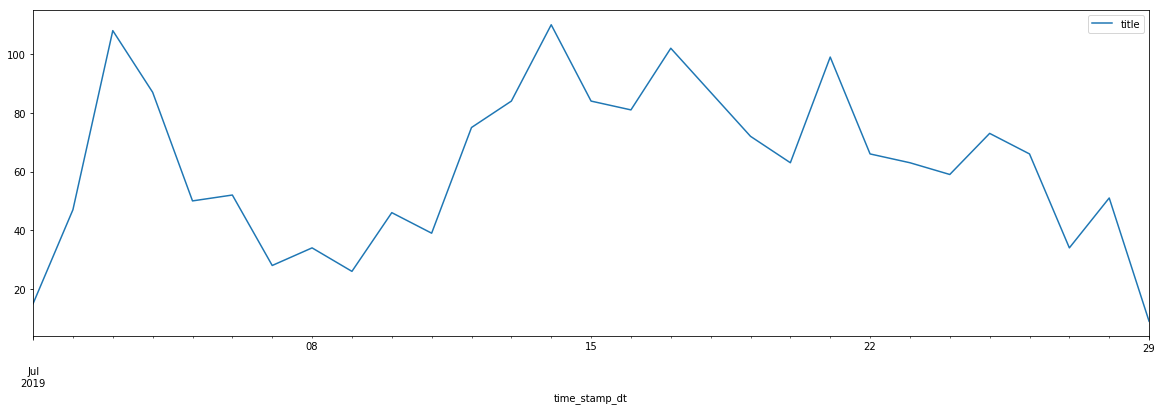

In [80]:
draw_clien_trend_by_keyword('불매')

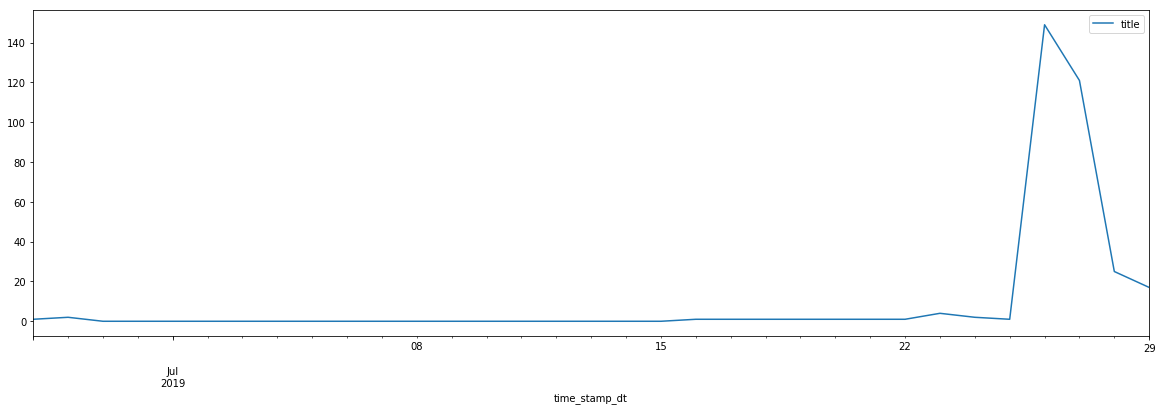

In [84]:
draw_clien_trend_by_keyword('호날두')

# 좋아요 많은 게시물

In [85]:
clien.head()

,board_name,hit,like,nickname,time_stamp,time_stamp_dt,title
0,모공,1,0,뱃살아재,2019-07-29 09:35:12,2019-07-29 09:35:12,아수스 AC5300이 공유기 끝판왕인 이유
1,모공,40,0,영엠디,2019-07-29 09:34:56,2019-07-29 09:34:56,일본을 앞지르는걸 볼 수 있겠죠?
2,직홍게,3,0,skmagic원탑몰,2019-07-29 09:34:36,2019-07-29 09:34:36,[SK매직공식접수처][비/교/불/가][무조건역대급대박지급]#얼음정수기#공기청정기#비데
3,아질게,28,0,앤죠,2019-07-29 09:33:56,2019-07-29 09:33:56,인덕션냄비
4,모공,394,0,외선이,2019-07-29 09:33:46,2019-07-29 09:33:46,정말 불쌍한 멍뭉이들.gif


In [203]:
june = [(6,day) for day in range(24,31)]
july = [(7,day) for day in range(1,30)]
total_days = june + july

liked = pd.DataFrame()
for month, day in total_days:
    idx_day = (mogong['time_stamp_dt'].dt.month == month) & (mogong['time_stamp_dt'].dt.day == day)
    tmp = mogong.loc[idx_day].sort_values('like', ascending=False).head(20)
    liked = liked.append(tmp, sort=False)

liked.head()

,board_name,hit,like,nickname,time_stamp,time_stamp_dt,title
113302,모공,5115,11,다크곰,2019-06-24 23:56:12,2019-06-24 23:56:12,세탁기 돌리기 전에 메모 하세요
113310,모공,1215,6,로히,2019-06-24 23:52:41,2019-06-24 23:52:41,아이즈원) 프메도 앚망진창
113313,모공,6196,1,목천료향시가,2019-06-24 23:51:32,2019-06-24 23:51:32,롯데리아가 단종 시킨 버거들.jpg
113307,모공,9098,1,newbalance,2019-06-24 23:54:04,2019-06-24 23:54:04,지나가는 여자 꼬시는 방법.jpg
113305,모공,911,0,PotA,2019-06-24 23:54:45,2019-06-24 23:54:45,월요일밤 혼맥


## liked trend

In [225]:
tmp = get_clien_trend_by_keyword('일본', df=liked)
print(tmp.shape)
tmp2 = get_clien_trend_by_keyword('불매', df=liked)
print(tmp2.shape)
tmp3 = get_clien_trend_by_keyword('유니클로', df=liked)
print(tmp3.shape)
tmp5 = pd.concat([tmp, tmp2, tmp3], axis=0)
tmp5.shape

(34, 3)
(29, 3)
(24, 3)


(87, 3)

In [226]:
tmp5.head()

,time_stamp_dt,title,keyword
0,2019-06-26,1,일본
1,2019-06-27,0,일본
2,2019-06-28,1,일본
3,2019-06-29,0,일본
4,2019-06-30,0,일본


In [227]:
# tmp5.to_csv(dir_tableau + 'liked_trend.tsv', sep='\t', index=False)

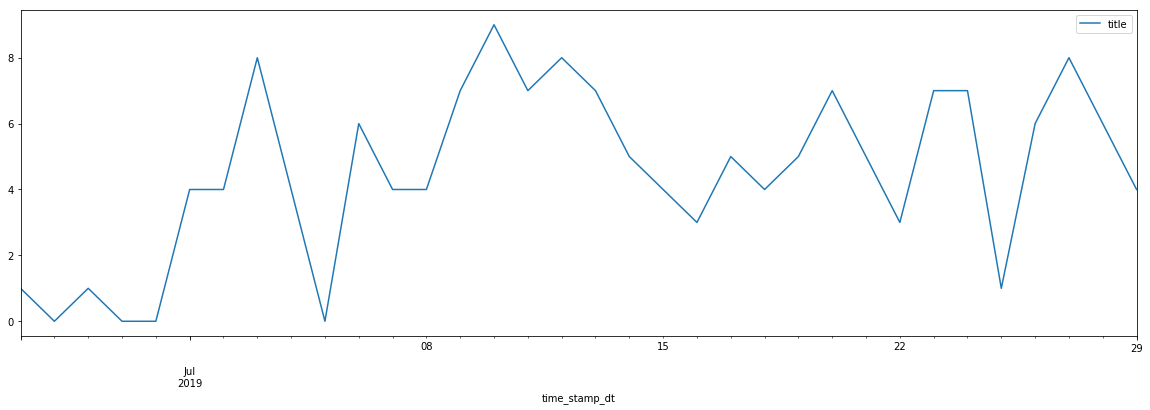

In [204]:
draw_clien_trend_by_keyword('일본', df=liked)

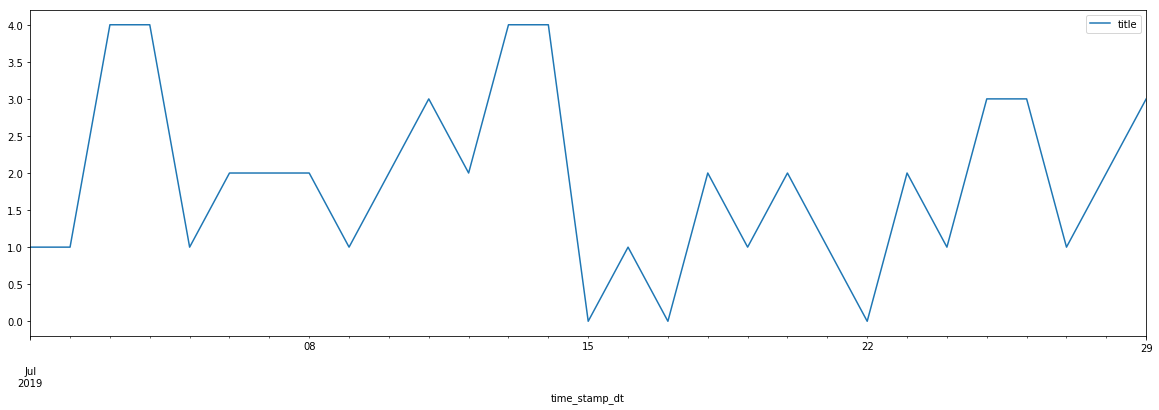

In [205]:
draw_clien_trend_by_keyword('불매', df=liked)

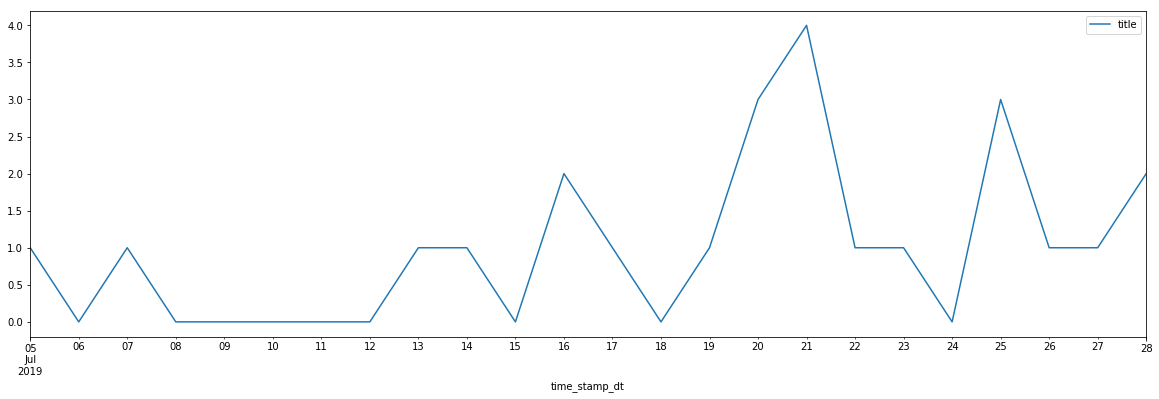

In [206]:
draw_clien_trend_by_keyword('유니클로', df=liked)